In [16]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

from sklearn.ensemble import RandomForestClassifier

from matplotlib import pyplot as plt
import seaborn as sns

# Ready Data

In [4]:
df = pd.read_csv('./kaggle/human-activity-prediction/train.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
df['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [13]:
df.info(max_cols=600)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 563 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tBodyAcc-mean()-X                     7352 non-null   float64
 1   tBodyAcc-mean()-Y                     7352 non-null   float64
 2   tBodyAcc-mean()-Z                     7352 non-null   float64
 3   tBodyAcc-std()-X                      7352 non-null   float64
 4   tBodyAcc-std()-Y                      7352 non-null   float64
 5   tBodyAcc-std()-Z                      7352 non-null   float64
 6   tBodyAcc-mad()-X                      7352 non-null   float64
 7   tBodyAcc-mad()-Y                      7352 non-null   float64
 8   tBodyAcc-mad()-Z                      7352 non-null   float64
 9   tBodyAcc-max()-X                      7352 non-null   float64
 10  tBodyAcc-max()-Y                      7352 non-null   float64
 11  tBodyAcc-max()-Z

In [10]:
df.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [12]:
df.isnull().sum().sum()

0

In [14]:
X = df.drop(['Activity'], axis=1)
y = df['Activity']

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


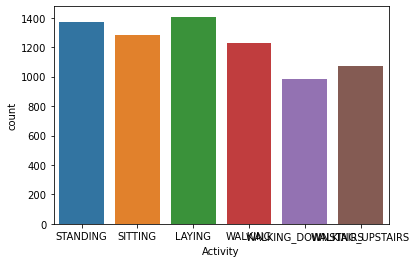

In [18]:
sns.countplot(y);plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Random Forest

In [21]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.9796057104010877

In [23]:
%time

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[50, 100, 150],
    'criterion':['gini', 'entropy'],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[8, 12, 18],
    'min_samples_split':[8, 16, 20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [50, 100, 150]})

In [24]:
# 최적 하이퍼 파라미터
grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 150}

In [30]:
# rf_clf = RandomForestClassifier(criterion='entropy',
#                                max_depth=12,
#                                min_samples_leaf=8,
#                                min_samples_split=8,
#                                n_estimators=150,
#                                random_state=0)
# rf_clf.fit(X_train, y_train)
pred = grid_cv.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.9714479945615228

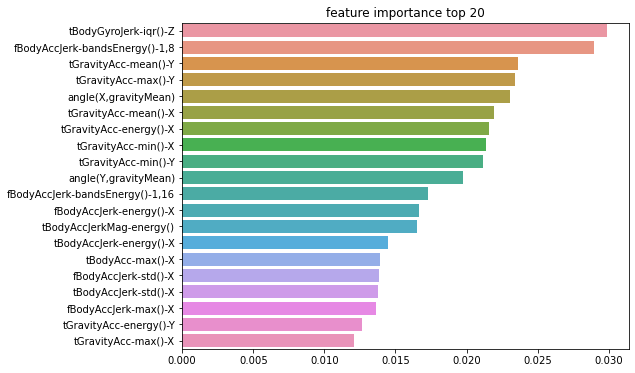

In [38]:
ftr_importances_values = grid_cv.best_estimator_.feature_importances_
ftr_importances_values = pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top20 = ftr_importances_values.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('feature importance top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',
                               max_depth=12,
                               min_samples_leaf=8,
                               min_samples_split=8,
                               #n_estimators=150,
                               random_state=0)

In [34]:
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.9524133242692047

In [35]:
%time

#from sklearn.model_selection import GridSearchCV
params = {
    'criterion':['gini', 'entropy'],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[8, 12, 18],
    'min_samples_split':[8, 16, 20]
}

dt_clf = RandomForestClassifier(random_state=0)
grid_cv_dt = GridSearchCV(dt_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv_dt.fit(X_train, y_train)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.2 µs


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20]})

In [36]:
accuracy_score(y_test, grid_cv_dt.best_estimator_.predict(X_test))

0.9741672331747111

# GBM


In [39]:

%%time

from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_accuracy

CPU times: user 7min 39s, sys: 2.82 s, total: 7min 41s
Wall time: 7min 54s


0.9884432358939497

# XGB

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]

xgb_clf.fit(X_train, y_train, early_stopping_rounds=400, eval_set=evals,
           eval_metric="mlogloss", verbose=True)
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

In [ ]:
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_accuracy